In [8]:
import pandas as pd
import numpy as np

from rdkit import DataStructs
from rdkit.Chem import AllChem, Lipinski, Descriptors

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from package import plot

In [9]:
df = pd.read_csv("initial.csv")
df["mol"] = [AllChem.MolFromSmiles(smiles) for smiles in df["smiles"]]

In [10]:
inv_df = df
df = df.sort_values("score").reset_index(drop=True)

In [11]:
lipinski_descriptors = [
    "NumAliphaticRings",
    "NumAromaticRings",
    "NumHDonors",
    "NumHAcceptors",
    "FractionCSP3",
    "RingCount"
]

In [12]:
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.molSize = (200, 200)   # Change image size
IPythonConsole.ipython_useSVG = True  # Change output to SVG

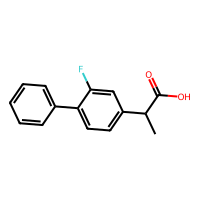

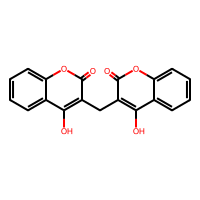

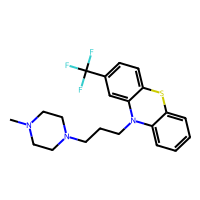

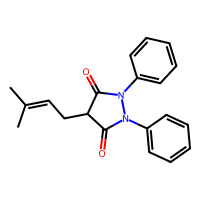

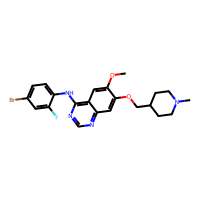

In [13]:
for mol in inv_df["mol"][:5]:
    display(mol)

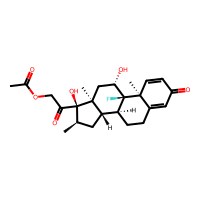

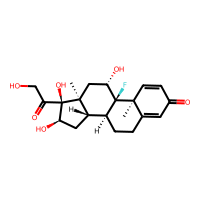

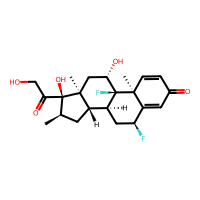

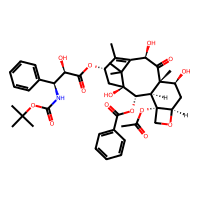

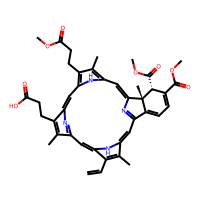

In [7]:
for mol in inv_df["mol"][-5:]:
    display(mol)

In [21]:
class scatter():
    def __init__(self,fingerprinter):
        self.fingerprinter = fingerprinter
        self.vec_fingerprints = [self.fingerprinter.GetFingerprint(mol) for mol in df["mol"]]
        fingerprints = np.array([np.array(vector) for vector in self.vec_fingerprints])
        self.fingerprints = StandardScaler().fit_transform(fingerprints)
    def plot(self,array,color=df["score"]):
        fig,ax = plt.subplots()
        im = ax.scatter(array[:,0],array[:,1],c=color,alpha=0.5,cmap="viridis")
        fig.colorbar(im,ax=ax)
        return fig, ax
    def dimred(self,pca=True,tnse=True):
        self.pca = PCA(n_components=2).fit_transform(self.fingerprints)
        self.plot(self.pca)
        self.tsne = TSNE(n_components=2,perplexity=30).fit_transform(self.fingerprints)
        self.plot(self.tsne)
        self.umap = UMAP(n_components=2,perplexity=30).fit_transform(self.fingerprints)
    

In [22]:
morgan = scatter(AllChem.GetMorganGenerator())

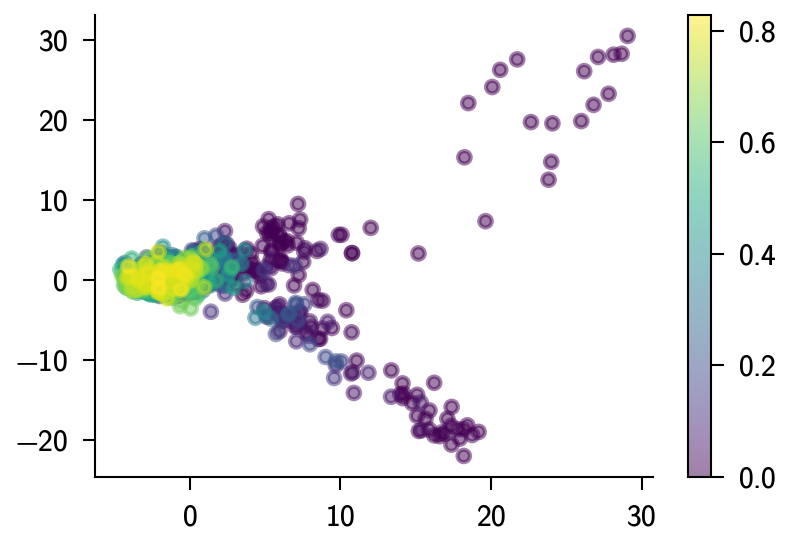

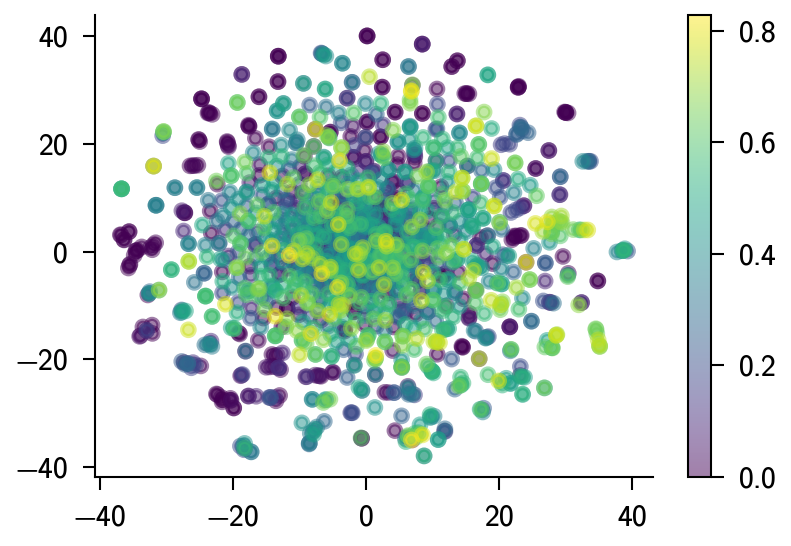

In [27]:
morgan.dimred()

Text(0.5, 1.0, 'ExactMolWt')

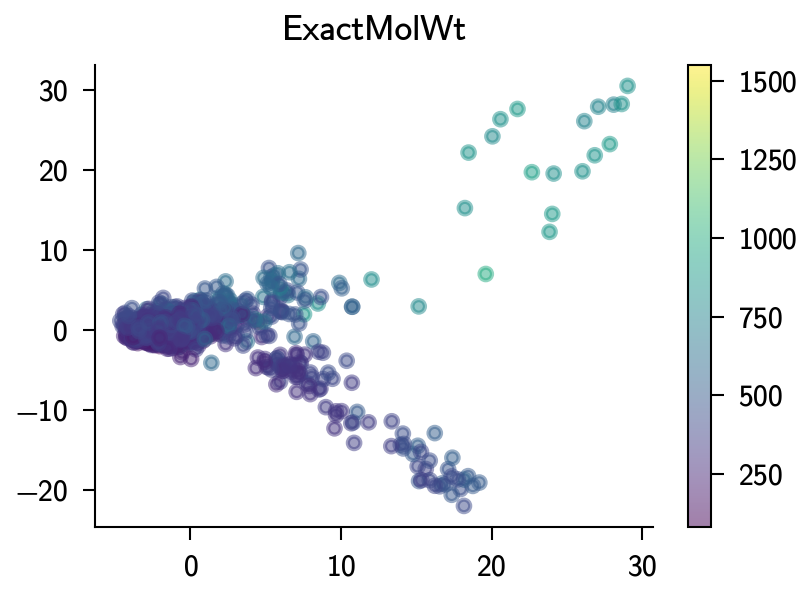

In [10]:
color = [getattr(Descriptors,"ExactMolWt")(mol) for mol in df["mol"]]
fig,ax = morgan.plot(morgan.pca,color=color)
ax.set_title("ExactMolWt")

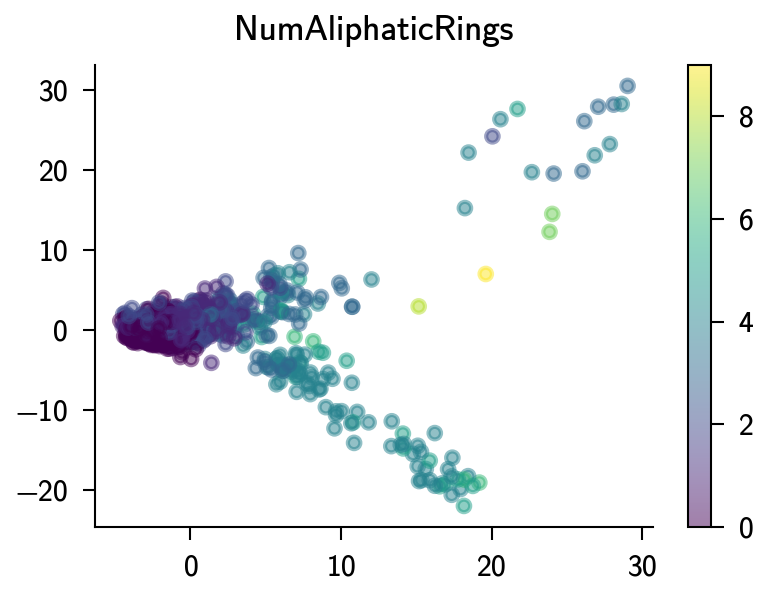

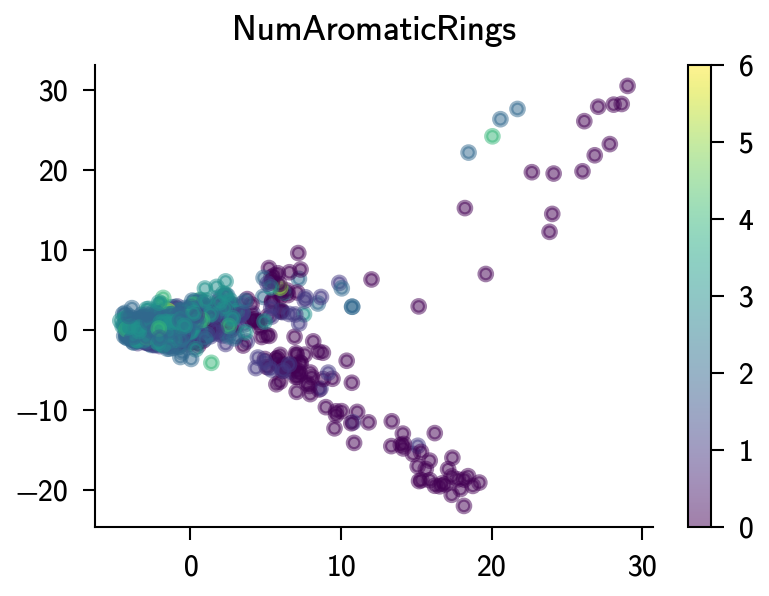

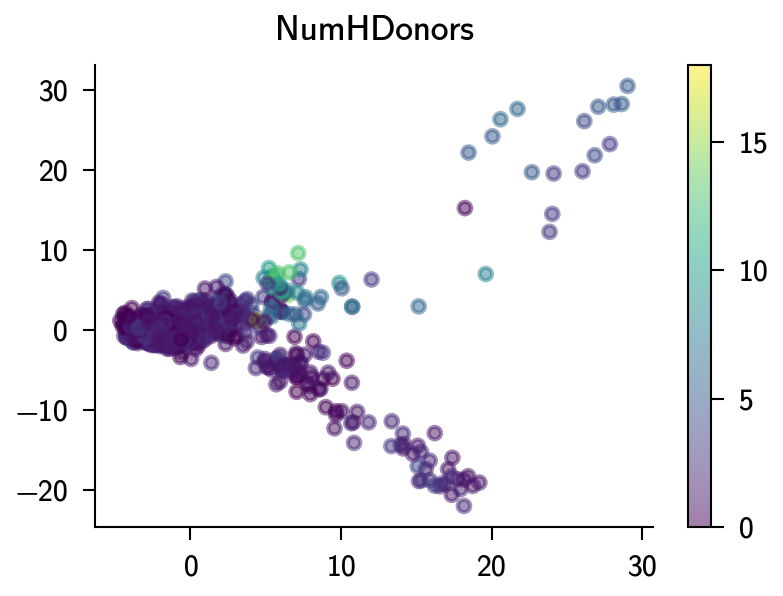

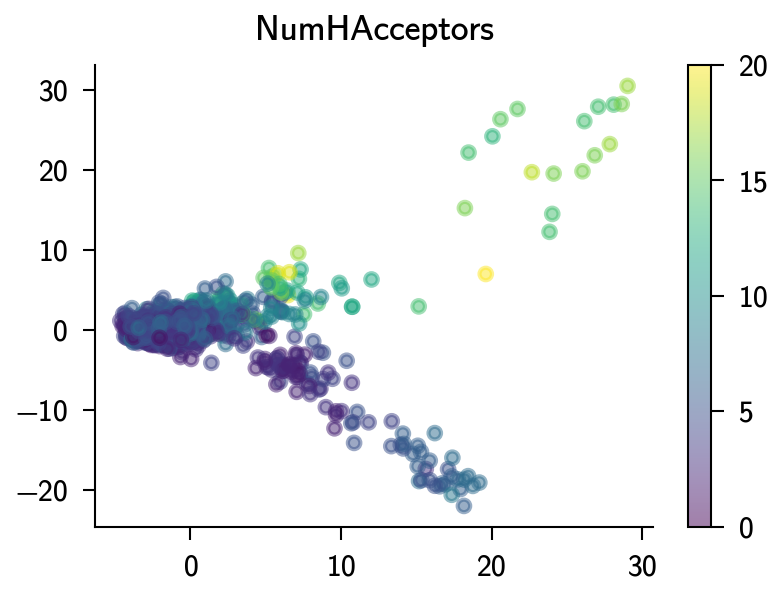

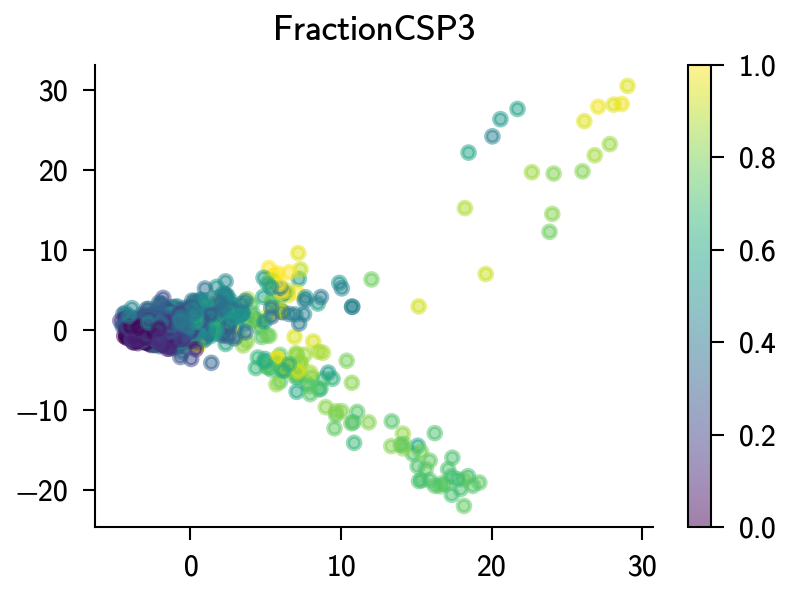

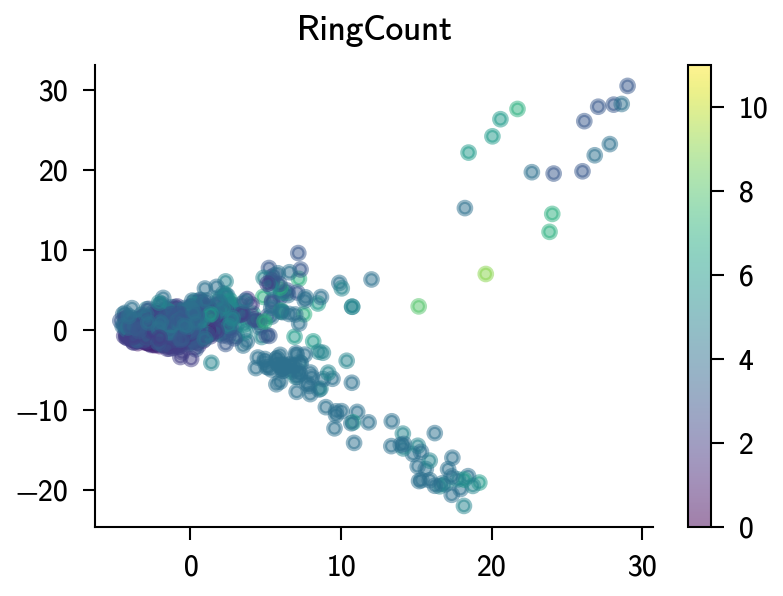

In [11]:
for descriptor in lipinski_descriptors:
    color = [getattr(Lipinski,descriptor)(mol) for mol in df["mol"]]
    fig,ax = morgan.plot(morgan.pca,color=color)
    ax.set_title(descriptor)

In [12]:
morgan

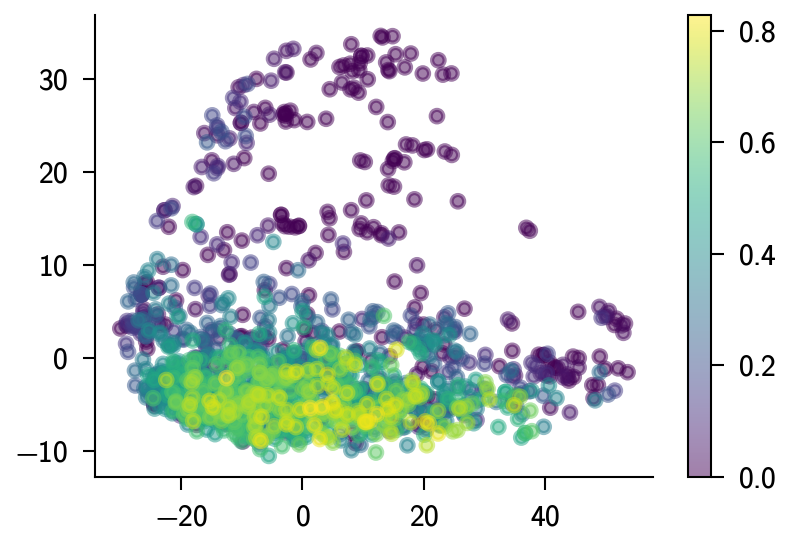

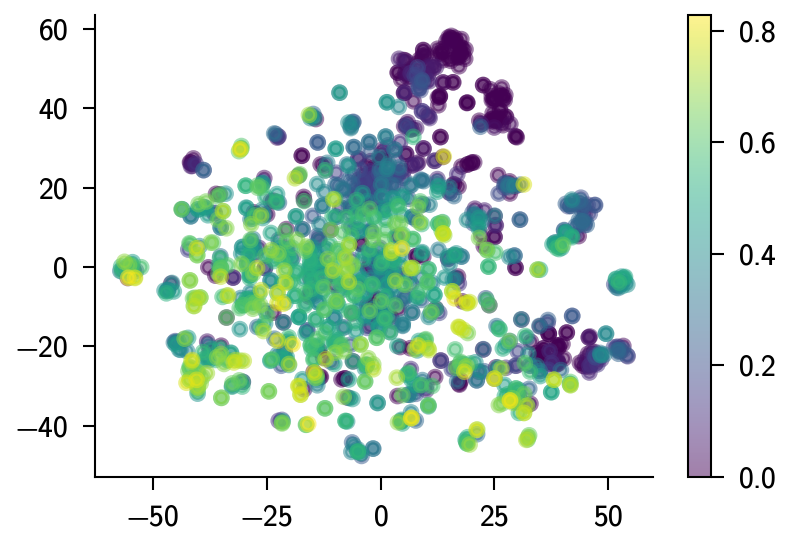

In [13]:
rdk = scatter(AllChem.GetRDKitFPGenerator())
rdk.dimred()

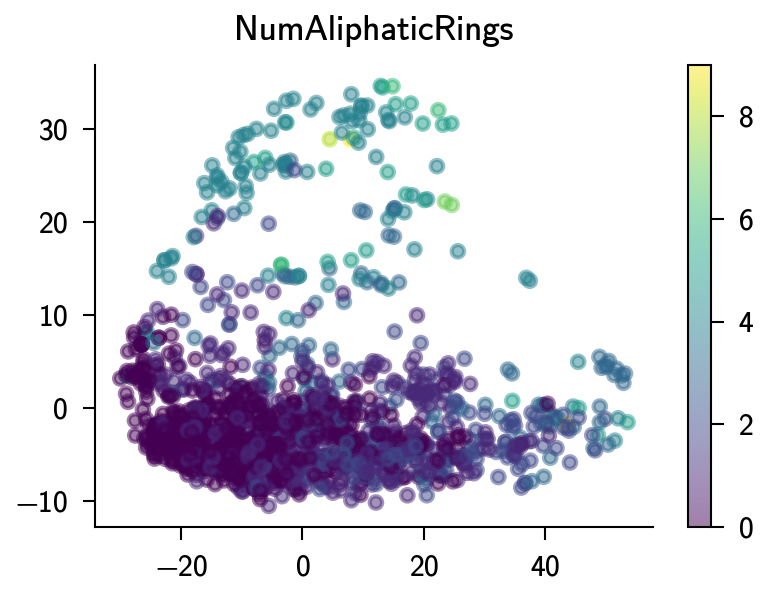

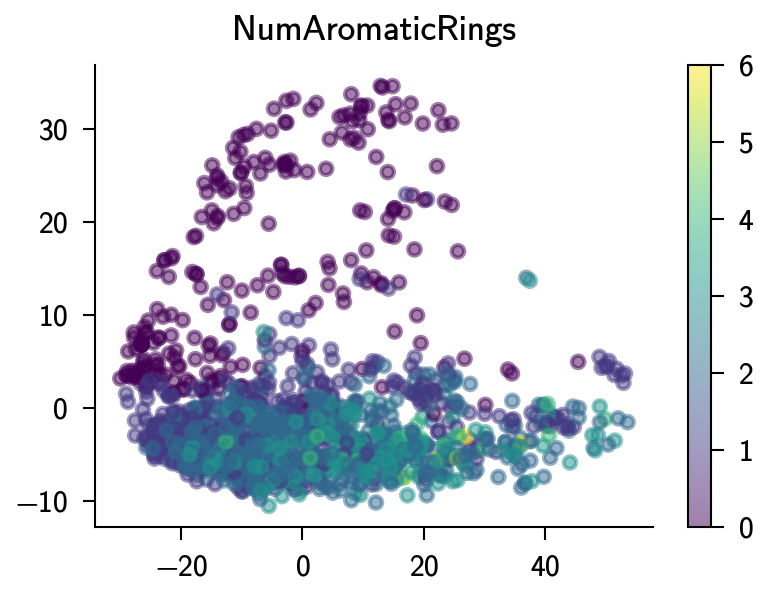

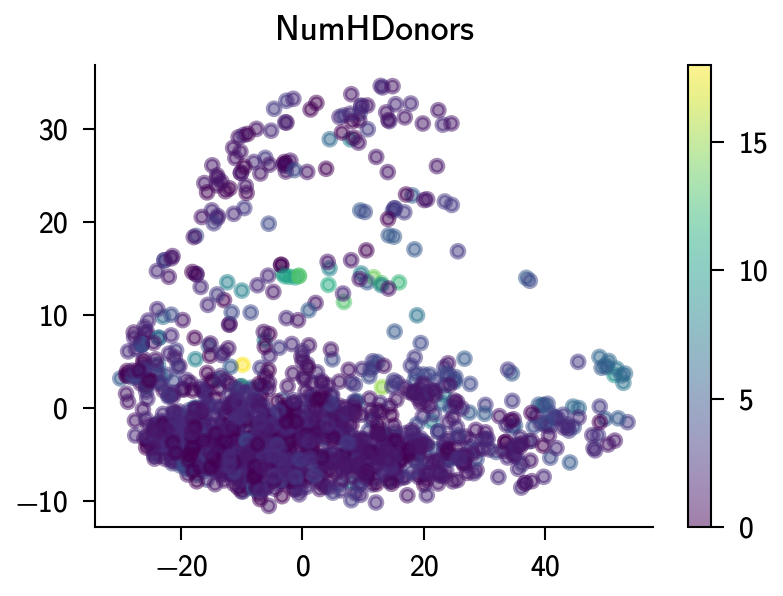

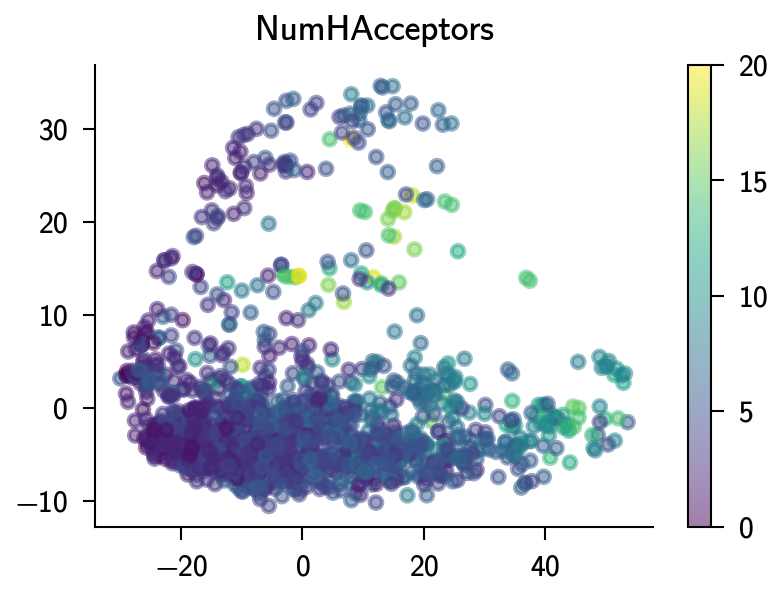

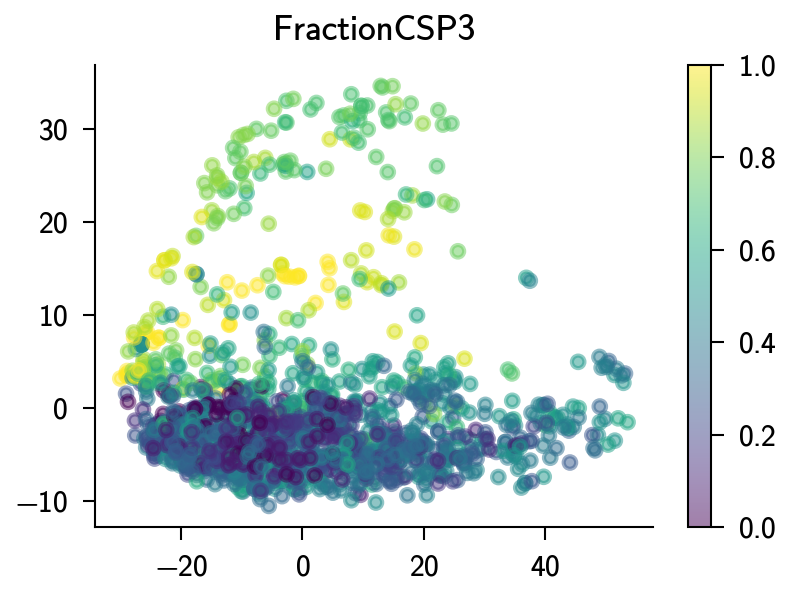

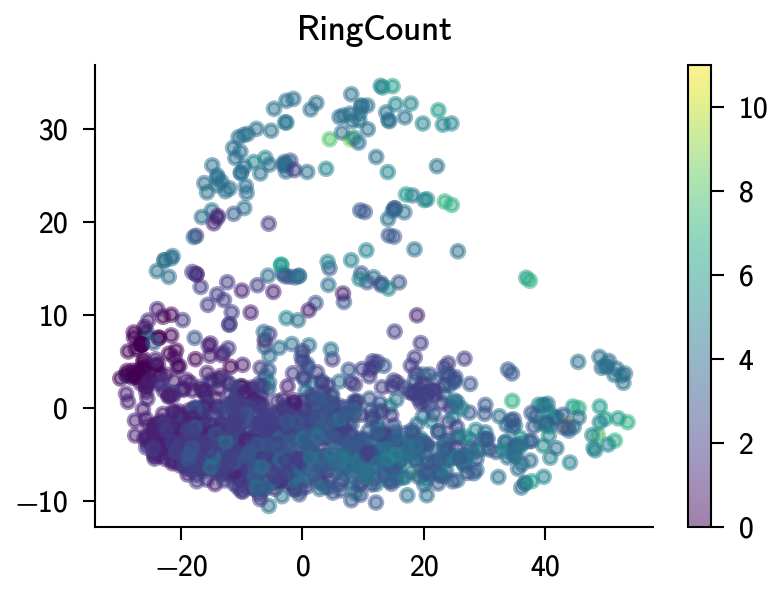

In [14]:
for descriptor in lipinski_descriptors:
    color = [getattr(Lipinski,descriptor)(mol) for mol in df["mol"]]
    fig,ax = morgan.plot(rdk.pca,color=color)
    ax.set_title(descriptor)

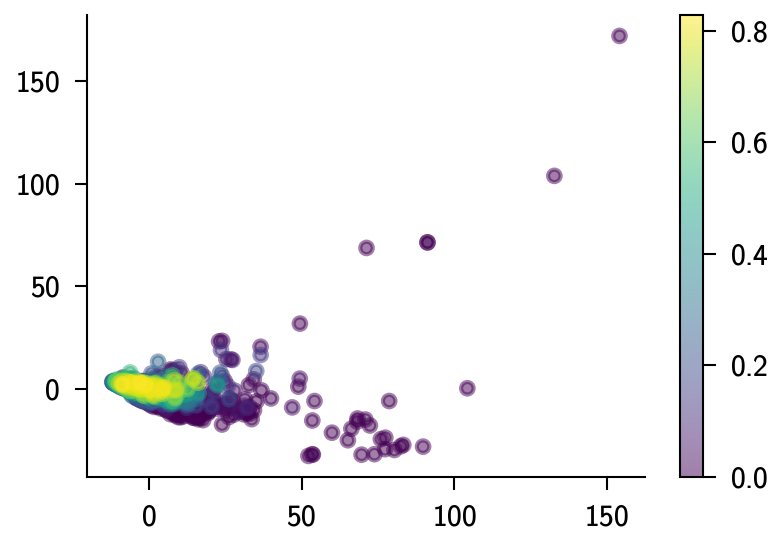

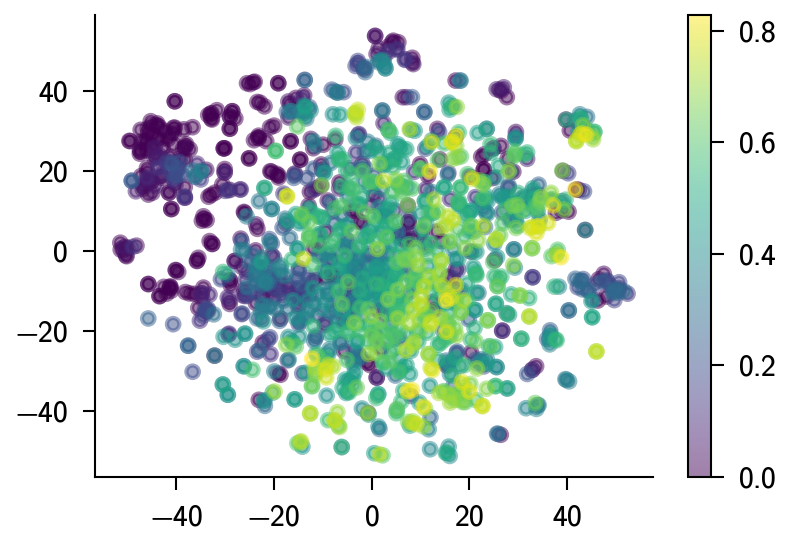

In [15]:
atompair = scatter(AllChem.GetAtomPairGenerator())
atompair.dimred()

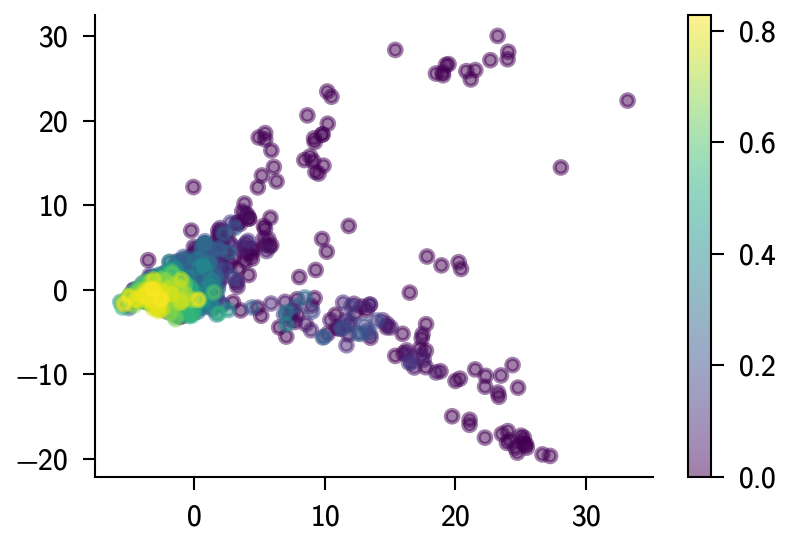

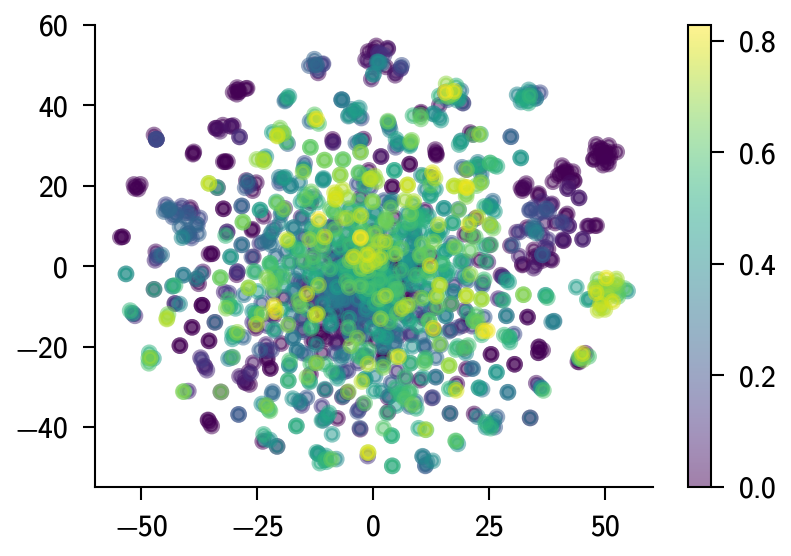

In [16]:
topologicaltorsion = scatter(AllChem.GetTopologicalTorsionGenerator())
topologicaltorsion.dimred()